**First Version Deception**___**Submitted By:Sikha Rani Das**

Ref Article:https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
path ="C:\Users\shikh\Desktop\\viz\IP\Deception"

Populating the interactive namespace from numpy and matplotlib


**1.0 1st Deceptive Design**: 

**Claim as per Chart No.1 of the Original Article**(Ref https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts): America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany, The US is an outlier on gun violence because it has way more guns than other developed nations.

**Rebuttal Claim as per Deception**: Compared to Honduras which is among the most violent countries in the world, America has 23 times less firearm homicides and nearly 6 times less firearm homicides as compared to South Africa, Brazil. So, firearm homicides in America is very less as compared to  violent countries in the world.


**Making-Of**:

**Step-1**, Data Collection:Following the link in the 1st chart, I could collect the data at the following link:
https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0. Data is also available as Deception_Chart1_World firearms murders and ownership - Sheet 1.csv at https://drive.google.com/open?id=1Zd82VJLR0VdymR1YvNA0m86L7lqy6fNT .
                            
**Step-2**, Data Wrangling:

1.1 First I read the csv from my local folder.The dataset has **Country/Territory,ISO code,Source, % of homicides by firearm, Number of homicides by firearm,Homicide by firearm rate per 100,000 pop,Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms** as Columns and each row represents one country.

1.2 I removed the NA and duplicate values.

1.3 Thereafter, I made one dataframe containg only necessary columns(i.e.Country/Territory','Homicide by firearm rate per 100,000 pop columns) to make the chart.

1.4 As considered in the original article, I also got Homicide by firearm rate per 1 million people.

1.5 I got the final dataframe, containing only countries with  homicide by firearm rate per 1 million people >=25 and sorted in descending order

**Step-3**, Plot: At last, I made bar plot with homicide by firearm rate per 1 million people in the x-axis and countries on the Y axis.

**Detailed steps are shown below**:

In [2]:
## 1.1 Read Data
firearm_deaths_world = pd.read_csv(path + '\Deception_Chart1_World firearms murders and ownership - Sheet 1.csv')

##Info about the dataset
firearm_deaths_world.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
Country/Territory                           185 non-null object
ISO code                                    184 non-null object
Source                                      116 non-null object
% of homicides by firearm                   116 non-null float64
Number of homicides by firearm              116 non-null float64
Homicide by firearm rate per 100,000 pop    116 non-null float64
Rank by rate of ownership                   176 non-null float64
Average firearms per 100 people             176 non-null float64
Average total all civilian firearms         176 non-null float64
dtypes: float64(6), object(3)
memory usage: 10.9+ KB


In [3]:
##1.2: Remove NA and duplicates(if any)
firearm_deaths_world=firearm_deaths_world.dropna()
firearm_deaths_world=firearm_deaths_world.drop_duplicates()

##1.3: Make one dataframe with Country/Territory','Homicide by firearm rate per 100,000 pop columns
firearm_deaths_world_final = firearm_deaths_world.loc[:,['Country/Territory','Homicide by firearm rate per 100,000 pop']]

##1.4 As considered in the original article, I also got Homicide by firearm rate per 1 million people 
firearm_deaths_world_final['Homicide by firearm rate per 1 million people'] = \
firearm_deaths_world_final['Homicide by firearm rate per 100,000 pop']*10

##1.5 Make one dataframe,  having countries with  homicide by firearm rate per 1 million people >=25 and sort in descending order

firearm_deaths_world_final=\
firearm_deaths_world_final.loc[firearm_deaths_world_final['Homicide by firearm rate per 1 million people']>=25]
firearm_deaths_world_final=\
firearm_deaths_world_final.sort_values(by='Homicide by firearm rate per 1 million people', ascending=False)
firearm_deaths_world_final.head()

,Country/Territory,"Homicide by firearm rate per 100,000 pop",Homicide by firearm rate per 1 million people
72,Honduras,68.43,684.3
51,El Salvador,39.90,399.0
83,Jamaica,39.40,394.0
179,Venezuela,38.97,389.7
67,Guatemala,34.81,348.1


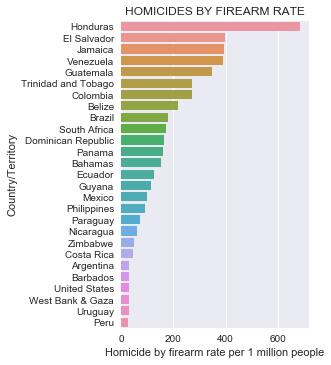

In [4]:
##Plot the chart

plot =sns.factorplot(y='Country/Territory', data=firearm_deaths_world_final,\
               x='Homicide by firearm rate per 1 million people',aspect=.9,size=5, kind='bar')

##set title
plt.title('HOMICIDES BY FIREARM RATE')


In my opinion, the above chart can be used to decept audience because it shows clearly US has less firearm homicides as compared to other violent nations in the world.

**Detours for Deception**: 
1. I changed the baseline of comparison from developed countries to countries with Homicide by firearm rate per 1 million people more than 25 million.


**2.0 2nd Deceptive Design**:

**Claim as per Chart No.10 of the Original Article**(Ref https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts): Most gun deaths are suicides.

**Rebuttal Claim as per Deception**: Gun deaths due to suicides and homicides are nearly equal.

**Making-Of**:

**Step-1**, Data Collection:
Following the link in the chart no.10, I could collect the data at the following link:
https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

**While Downloading the dataset for homicides**, options I choose were:Intent-Homicide,Cause-Firearm, Specific Options:Years of Report-1999 to 2015,Output Group: Year. Data is also available as Deception_Chart10_results_firearm_homicide.csv at https://drive.google.com/open?id=1Zd82VJLR0VdymR1YvNA0m86L7lqy6fNT .

**While Downloading the dataset for suicides**, options I choose were:Intent-Suicide,Cause-Firearm, Specific Options:Years of Report-1999 to 2015,Output Group: Year.  Data is also available as Deception_Chart10_results_firearm_suicide.csv at https://drive.google.com/open?id=1Zd82VJLR0VdymR1YvNA0m86L7lqy6fNT .
                             
**Step-2**, Data Wrangling:

2.1 First I read the dataset for suicide and homicide separetely from my local folder.Both,the dataset has **Sex,Race,	State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate** as Columns and each row represents data for a year for the particular cause of death.

2.2 Thereafter, I merged the two datasets and removed the NA and duplicate values.

2.3 I converted year column to type numeric.

2.4 I made the final dataframe containing only the years from 1999 to 2007.

**Step-3**, Plot: At last, I made point plot with 'Year' on the x-axis, 'Deaths' on the y-axis, 'Cause of Death' as hue.

**Detailed steps are shown below**:

In [5]:
## 2.1.1 Read firearm_homicide Data
firearm_homicide = pd.read_csv(path + '\Deception_Chart10_results_firearm_homicide.csv')
## Info about Dataset
firearm_homicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
Sex               18 non-null object
Race              18 non-null object
State             18 non-null object
Ethnicity         18 non-null object
Age Group         18 non-null object
First Year        18 non-null int64
Last Year         18 non-null int64
Cause of Death    18 non-null object
Year              17 non-null float64
Deaths            18 non-null int64
Population        18 non-null int64
Crude Rate        18 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.3+ KB


In [6]:
## 2.1.2 Read firearm_suicide Data
firearm_suicide = pd.read_csv(path + '\Deception_Chart10_results_firearm_suicide.csv')
## Info about Dataset
firearm_homicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
Sex               18 non-null object
Race              18 non-null object
State             18 non-null object
Ethnicity         18 non-null object
Age Group         18 non-null object
First Year        18 non-null int64
Last Year         18 non-null int64
Cause of Death    18 non-null object
Year              17 non-null float64
Deaths            18 non-null int64
Population        18 non-null int64
Crude Rate        18 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.3+ KB


In [7]:
#2.2 Merge the datasets and drop na and duplicates thereafter.

mdf =firearm_homicide.append(firearm_suicide)
mdf=mdf.dropna()
mdf=mdf.drop_duplicates()

## 2.3 Convert year to numeric
mdf.Year = pd.to_numeric(mdf.Year, errors='coerce')

## 2.4  Make final dataframe containing data only for the years 1999 to 2007
mdf_final=mdf.loc[(mdf.Year >= 1999) & (mdf.Year <= 2007) , :]


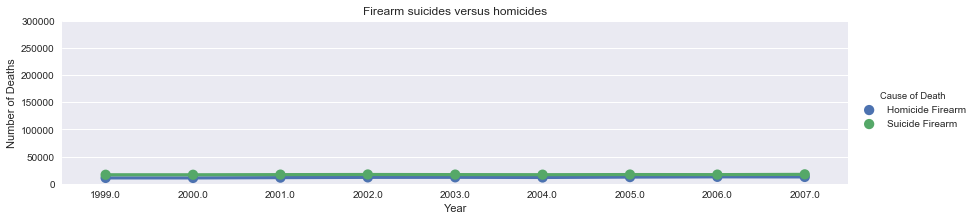

In [8]:
##Plot the chart
g = sns.factorplot(x='Year', y= 'Deaths', hue='Cause of Death',kind='point',data=mdf_final, size=3, aspect=4)

##Set y label
g.set(ylabel="Number of Deaths")

##Set Title
g.set(title="Firearm suicides versus homicides")

## Increase the y limit to 300000
g.set(ylim=(0, 300000))


In the above chart, it can be seen that firearm deaths for homicide and suicide are almost equal as opposed to Most gun deaths are suicides in chart no.10 of vox article.

**Detours for deceptions**:

1.To manipulate the trend, I took data only for the years 1999 to 2007.This intentional cut of patricular period of time has helped me to arrive at the deceptive claim.This graph gives the impression of consistently nearly same values for suicides and homicides, but in context these values are anomalous.

2.Changing the y-axis maximum affects how the graph appears. I increased the range of Y axis to 300,000 from 24,000 in the original graph.A higher maximum has helped to decrease the gap between the suicide and homicides.But i kept starting point at 0 so as to make it not look deceptive.

3.I also changed  the ratio of a graph's dimensions to  affect  the graph's appearance. I kept the aspect ratio of the chart at 3 to flatten the lines more. 



**3.0 3rd Deception**:

**Claim as per Chart No.15 of the Original Article**(Ref https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts): Support for gun ownership has sharply increased since the early 2000s, the chart claims that Americans have shifted from mostly supporting the concept of gun control to greater support for protecting “the right of Americans to own guns

**Rebuttal Claim as per Deception**: Support for gun ownership has remained the same since the early 2000s, and since the early 2000 supporters for the concept of gun control and supporters for protecting the right of Americans were always the same. 

**Making-Of**:
**Step-1**, Data Collection:
Following the link in the chart no.15, I could collect the data at the following link:
http://www.people-press.org/datasets/


Dataset was found from  PEW RESEARCH CENTER,APRIL  5-11,2017 POLITICAL SURVEY as reponse to Q.80 . Since the dataset was in pdf form.So I first converted  the data to excel.Extracted data is available as Deception_chart15_GUN_OWNERSHIP_VS_GUN_CONTROL.csv at https://drive.google.com/open?id=1Zd82VJLR0VdymR1YvNA0m86L7lqy6fNT                                                           
                                     
**Step-2**, Data Wrangling:

3.1 First I read the dataset  from my local folder.Both,the dataset has **DATA, Protect right to own guns, Control gun ownership** as Columns and each row represents data for random months of year .

3.2 I made a new column Year from DATE Column and then convert year column to type numeric.

3.3 Next, I made  one new dataframe with columns aggregated by average for each year.

3.4 Finally, I made the final dataframe containing data only for the years 2010 to 2017

**Step-3**, Plot: At last, I Plot the chart with Year on the x-axix, 'Protect right to own guns' &'Control gun ownership' on Y-axis.


**Detailed steps are shown below**:

In [9]:
gun_control_vs_own=pd.read_csv(path + '\Deception_chart15_GUN_OWNERSHIP_VS_GUN_CONTROL.csv')
gun_control_vs_own.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
DATE                         28 non-null object
Protect right to own guns    28 non-null int64
Control gun ownership        28 non-null int64
dtypes: int64(2), object(1)
memory usage: 596.0+ bytes


In [10]:
## 3.2 Make a new column Year from DATE Column and then convert year column to type numeric
gun_control_vs_own['Year'] = gun_control_vs_own['DATE'].str.split('-').str[1]
gun_control_vs_own.Year = pd.to_numeric(gun_control_vs_own.Year, errors='coerce')
gun_control_vs_own.head()

## 3.3 Make one new dataframe with columns aggregated by average for each year
gun_control_vs_own_avg = gun_control_vs_own.groupby('Year', as_index=False).agg({'Protect right to own guns':'mean','Control gun ownership':'mean'})

## 3.4  Make final dataframe containing data only for the years 2010 to 2017
gun_control_vs_own_final=gun_control_vs_own_avg.loc[(gun_control_vs_own_avg.Year >= 10) & (gun_control_vs_own_avg.Year <= 17) , :]

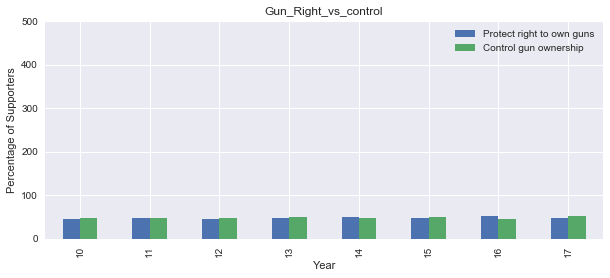

In [11]:
##Create tuple to be used for xticks (use loop to create tuple programatically)
t = []
for i in range(0,300,50):
    t.append(i)
t_t = tuple(t)


##Plot the chart with Year on the x-axix, 'Protect right to own guns' &'Control gun ownership' on Y-axis.
h=gun_control_vs_own_final.plot(x='Year', y=['Protect right to own guns','Control gun ownership'],\
                                kind='bar',figsize=(10,4),title='Gun_Right_vs_control',xticks=t_t)
##Increase range of Y axis 
h.set(ylim=(0, 500))

h.set(ylabel="Percentage of Supporters")

From above it is seen that, support for gun ownership has remained almost the same since the early 2000s. Also, since the early 2000 supporters for the concept of gun control and supporters for protecting the right of Americans were  almost the same with slight increase/decrease sometimes for gun control and sometimes for protecting the right.

**Detour for Deception**:
1. Changing the y-axis maximum affects how the graph appears. I increased the range of Y axis.But i kept starting point at 0 so as to make it not look deceptive.

2. To manipulate the trend, I took data for only those years(i.e. 2010 to 2017) where there is no increase in number of supporters and also number of supporters is almost the same for concept of gun control and supporters for protecting the right of Americans .This intentional cut of patricular period of time has helped me to arrive at the deceptive claim.




4.0 **Road-map with future features/enhancements**:
    
1. I would like to make the charts interactive so that users can get more information by scrolling over or clicking on the chart area.
2. I would like to explore similar deceptive charts using other vizualization tools such as D3.js.
3. I would also like to explore the charts using other deceptive techniques.